# EDA - Technical Analysis Data (OHLCV)

**Exploratory Data Analysis** cho dữ liệu giá cổ phiếu Việt Nam (2022-2025)

---

## Nội dung

1. **Mô tả dữ liệu** (Data Description)
2. **Kiểm tra chất lượng dữ liệu** (Data Quality Check)
3. **Tạo đặc trưng cơ bản** (Feature Engineering)
4. **Trực quan hóa & Phân tích** (Visualization & Insights)
5. **Tổng kết** (Conclusion)

## 0. Import Libraries & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load data
DATA_PATH = Path("../../data/raw/ta/ta_data_top100_2023-01-01_2025-10-31.csv")

df = pd.read_csv(DATA_PATH)
df['time'] = pd.to_datetime(df['time'])

print(f"✓ Data loaded successfully: {DATA_PATH.name}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Dataset: TOP 100 STOCKS (selected by FA ranking)")

✓ Data loaded successfully: ta_data_top100_2023-01-01_2025-10-31.csv
Shape: 66,322 rows × 7 columns
Dataset: TOP 100 STOCKS (selected by FA ranking)


In [3]:
# Quick preview
df.head(10)

,time,open,high,low,close,volume,symbol
0,2023-01-03,48.00,49.4,47.00,49.40,1623481,VHM
1,2023-01-04,49.90,49.9,49.00,49.00,1176949,VHM
2,2023-01-05,49.00,50.0,49.00,49.70,1952371,VHM
3,2023-01-06,49.75,50.3,49.50,49.90,1172495,VHM
4,2023-01-09,50.20,50.5,49.70,50.20,1197058,VHM
5,2023-01-10,50.10,50.4,49.75,49.75,895178,VHM
6,2023-01-11,50.30,50.9,49.80,50.80,1187504,VHM
7,2023-01-12,51.10,51.7,51.00,51.50,1239502,VHM
8,2023-01-13,51.70,52.0,51.10,52.00,1047651,VHM
9,2023-01-16,52.00,52.3,51.30,51.30,1119444,VHM


---

## 1. Mô tả Dữ liệu (Data Description)

### 1.1. Cấu trúc Dữ liệu (Data Structure)

In [4]:
# Dataset shape
print("=" * 60)
print("DATASET STRUCTURE")
print("=" * 60)
print(f"Total Rows:    {df.shape[0]:>12,}")
print(f"Total Columns: {df.shape[1]:>12,}")
print(f"\nMemory Usage:  {df.memory_usage(deep=True).sum() / 1024**2:>12,.2f} MB")
print("=" * 60)

DATASET STRUCTURE
Total Rows:          66,322
Total Columns:            7

Memory Usage:          6.83 MB


In [5]:
# Data types
print("\nDATA TYPES:")
print(df.dtypes)
print("\n" + "=" * 60)


DATA TYPES:
time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
symbol            object
dtype: object



### 1.2. Phạm vi Dữ liệu (Data Scope)

In [6]:
# Time scope
print("=" * 60)
print("DATA SCOPE")
print("=" * 60)
print(f"Start Date:         {df['time'].min().strftime('%Y-%m-%d')}")
print(f"End Date:           {df['time'].max().strftime('%Y-%m-%d')}")
print(f"Total Days:         {(df['time'].max() - df['time'].min()).days:,} days")
print(f"Unique Symbols:     {df['symbol'].nunique():,} stocks")
print(f"Avg Rows/Symbol:    {df.shape[0] / df['symbol'].nunique():,.0f} rows")
print("=" * 60)

DATA SCOPE
Start Date:         2023-01-03
End Date:           2025-10-31
Total Days:         1,032 days
Unique Symbols:     100 stocks
Avg Rows/Symbol:    663 rows


### 1.3. Thống kê Tóm tắt (Summary Statistics)

In [7]:
# Summary statistics
print("\nSUMMARY STATISTICS (OHLCV):")
print("=" * 80)
display(df[['open', 'high', 'low', 'close', 'volume']].describe())


SUMMARY STATISTICS (OHLCV):


,open,high,low,close,volume
count,66322.000000,66322.000000,66322.000000,66322.000000,6.632200e+04
mean,30.988411,31.357050,30.585977,30.984231,2.079523e+06
std,32.761660,33.209062,32.250220,32.754193,6.399977e+06
min,0.180000,0.180000,0.180000,0.180000,0.000000e+00
25%,8.990000,9.080000,8.840000,8.990000,2.500000e+03
50%,19.320000,19.550000,19.090000,19.320000,9.169000e+04
75%,42.100000,42.550000,41.650000,42.050000,1.056041e+06
max,374.180000,384.270000,332.120000,349.510000,2.159991e+08


In [8]:
# Observations
print("\n📊 OBSERVATIONS:")
print(f"  • Price range: {df['close'].min():.2f} - {df['close'].max():,.2f} VND")
print(f"  • Average close price: {df['close'].mean():,.2f} VND")
print(f"  • Price std deviation: {df['close'].std():,.2f} VND (high variability)")
print(f"  • Volume is highly skewed (mean >> median)")
print(f"  • Max volume: {df['volume'].max():,.0f} (potential outlier or IPO day)")


📊 OBSERVATIONS:
  • Price range: 0.18 - 349.51 VND
  • Average close price: 30.98 VND
  • Price std deviation: 32.75 VND (high variability)
  • Volume is highly skewed (mean >> median)
  • Max volume: 215,999,100 (potential outlier or IPO day)


---

## 2. Kiểm tra Chất lượng Dữ liệu (Data Quality Check)

### 2.1. Kiểm tra Giá trị Thiếu (Missing Values)

In [9]:
# Missing values analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_data.to_string(index=False))
print("=" * 60)

if df.isnull().sum().sum() == 0:
    print("✓ No missing values detected!")
else:
    print("⚠ Missing values found - need handling")

MISSING VALUES ANALYSIS
Column  Missing_Count  Missing_Percentage
  time              0                 0.0
  open              0                 0.0
  high              0                 0.0
   low              0                 0.0
 close              0                 0.0
volume              0                 0.0
symbol              0                 0.0
✓ No missing values detected!


### 2.2. Kiểm tra Tính Nhất quán (Consistency Check)

In [10]:
# Consistency checks
print("=" * 60)
print("CONSISTENCY CHECKS")
print("=" * 60)

# Price logic checks
invalid_high_low = (df['high'] < df['low']).sum()
invalid_high_close = (df['high'] < df['close']).sum()
invalid_high_open = (df['high'] < df['open']).sum()
invalid_low_close = (df['low'] > df['close']).sum()
invalid_low_open = (df['low'] > df['open']).sum()
invalid_volume = (df['volume'] < 0).sum()

print(f"Rows where HIGH < LOW:   {invalid_high_low:>10,}")
print(f"Rows where HIGH < CLOSE: {invalid_high_close:>10,}")
print(f"Rows where HIGH < OPEN:  {invalid_high_open:>10,}")
print(f"Rows where LOW > CLOSE:  {invalid_low_close:>10,}")
print(f"Rows where LOW > OPEN:   {invalid_low_open:>10,}")
print(f"Rows where VOLUME < 0:   {invalid_volume:>10,}")
print("=" * 60)

total_inconsistent = (invalid_high_low + invalid_high_close + invalid_high_open + 
                      invalid_low_close + invalid_low_open + invalid_volume)

if total_inconsistent == 0:
    print("✓ All price logic checks passed!")
else:
    print(f"⚠ Found {total_inconsistent} inconsistent rows")

CONSISTENCY CHECKS
Rows where HIGH < LOW:            0
Rows where HIGH < CLOSE:          0
Rows where HIGH < OPEN:           2
Rows where LOW > CLOSE:           0
Rows where LOW > OPEN:            0
Rows where VOLUME < 0:            0
⚠ Found 2 inconsistent rows


In [11]:
# Check for duplicates
print("\nDUPLICATE CHECK:")
duplicates = df.duplicated(subset=['time', 'symbol']).sum()
print(f"Duplicate (time, symbol) pairs: {duplicates:,}")

if duplicates > 0:
    print("⚠ Found duplicate records - need to deduplicate")
else:
    print("✓ No duplicates found")


DUPLICATE CHECK:
Duplicate (time, symbol) pairs: 0
✓ No duplicates found


---

## 3. Tạo Đặc trưng Cơ bản (Feature Engineering)

In [12]:
# Sort data by symbol and time
df = df.sort_values(['symbol', 'time']).reset_index(drop=True)

# Calculate features for each symbol
print("Creating technical indicators...")

# ========================================
# 1. PRICE-BASED FEATURES
# ========================================

# Price Range (High - Low)
df['price_range'] = df['high'] - df['low']

# Price Range % (intraday volatility)
df['price_range_pct'] = (df['price_range'] / df['low']) * 100

# Upper Shadow (distance from close to high)
df['upper_shadow'] = df['high'] - df[['open', 'close']].max(axis=1)

# Lower Shadow (distance from low to close)
df['lower_shadow'] = df[['open', 'close']].min(axis=1) - df['low']

# Body Size (distance between open and close)
df['body_size'] = abs(df['close'] - df['open'])

# Body Size %
df['body_size_pct'] = (df['body_size'] / df['open']) * 100

# Typical Price (average of high, low, close)
df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3

# ========================================
# 2. MOVING AVERAGES
# ========================================

# Simple Moving Averages (SMA)
for window in [5, 10, 20, 50]:
    df[f'ma_{window}'] = df.groupby('symbol')['close'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

# Exponential Moving Averages (EMA)
for window in [12, 26]:
    df[f'ema_{window}'] = df.groupby('symbol')['close'].transform(
        lambda x: x.ewm(span=window, adjust=False).mean()
    )

# MA Divergence % (distance from price to MA)
df['ma_5_divergence'] = ((df['close'] - df['ma_5']) / df['ma_5']) * 100
df['ma_20_divergence'] = ((df['close'] - df['ma_20']) / df['ma_20']) * 100
df['ma_50_divergence'] = ((df['close'] - df['ma_50']) / df['ma_50']) * 100

# ========================================
# 3. MOMENTUM INDICATORS
# ========================================

# RSI (Relative Strength Index) - 14 days
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['rsi_14'] = df.groupby('symbol')['close'].transform(lambda x: calculate_rsi(x, 14))

# MACD (Moving Average Convergence Divergence)
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df.groupby('symbol')['macd'].transform(
    lambda x: x.ewm(span=9, adjust=False).mean()
)
df['macd_histogram'] = df['macd'] - df['macd_signal']

# Stochastic Oscillator (14 days)
def calculate_stochastic(df_group, period=14):
    low_min = df_group['low'].rolling(window=period, min_periods=1).min()
    high_max = df_group['high'].rolling(window=period, min_periods=1).max()
    k = 100 * (df_group['close'] - low_min) / (high_max - low_min)
    return k

df['stochastic_k'] = df.groupby('symbol', group_keys=False).apply(
    lambda x: calculate_stochastic(x, 14)
).reset_index(level=0, drop=True)

df['stochastic_d'] = df.groupby('symbol')['stochastic_k'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# ========================================
# 4. VOLATILITY INDICATORS
# ========================================

# Historical Volatility (20-day rolling std of % change)
df['volatility_20'] = df.groupby('symbol')['close'].transform(
    lambda x: x.pct_change().rolling(window=20, min_periods=1).std() * 100
)

# Average True Range (ATR) - 14 days
df['tr1'] = df['high'] - df['low']
df['tr2'] = abs(df['high'] - df.groupby('symbol')['close'].shift(1))
df['tr3'] = abs(df['low'] - df.groupby('symbol')['close'].shift(1))
df['true_range'] = df[['tr1', 'tr2', 'tr3']].max(axis=1)
df['atr_14'] = df.groupby('symbol')['true_range'].transform(
    lambda x: x.rolling(window=14, min_periods=1).mean()
)
df.drop(['tr1', 'tr2', 'tr3', 'true_range'], axis=1, inplace=True)

# Bollinger Bands (20-day)
df['bb_middle'] = df['ma_20']
df['bb_std'] = df.groupby('symbol')['close'].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)
df['bb_upper'] = df['bb_middle'] + (2 * df['bb_std'])
df['bb_lower'] = df['bb_middle'] - (2 * df['bb_std'])
df['bb_width'] = ((df['bb_upper'] - df['bb_lower']) / df['bb_middle']) * 100
df['bb_position'] = ((df['close'] - df['bb_lower']) / (df['bb_upper'] - df['bb_lower'])) * 100

# ========================================
# 5. VOLUME INDICATORS
# ========================================

# Volume Moving Average (20-day)
df['volume_ma_20'] = df.groupby('symbol')['volume'].transform(
    lambda x: x.rolling(window=20, min_periods=1).mean()
)

# Volume Ratio (current volume vs average)
df['volume_ratio'] = df['volume'] / df['volume_ma_20']

# On-Balance Volume (OBV)
df['price_change'] = df.groupby('symbol')['close'].diff()
df['obv'] = df.groupby('symbol').apply(
    lambda x: (np.sign(x['price_change']) * x['volume']).fillna(0).cumsum()
).reset_index(level=0, drop=True)
df.drop('price_change', axis=1, inplace=True)

# Volume-Weighted Average Price (VWAP) - rolling 20 days
df['vwap_20'] = df.groupby('symbol').apply(
    lambda x: (x['typical_price'] * x['volume']).rolling(window=20, min_periods=1).sum() / 
              x['volume'].rolling(window=20, min_periods=1).sum()
).reset_index(level=0, drop=True)

# ========================================
# 6. TREND INDICATORS
# ========================================

# ADX (Average Directional Index) - 14 days
df['high_diff'] = df.groupby('symbol')['high'].diff()
df['low_diff'] = -df.groupby('symbol')['low'].diff()

df['plus_dm'] = np.where((df['high_diff'] > df['low_diff']) & (df['high_diff'] > 0), df['high_diff'], 0)
df['minus_dm'] = np.where((df['low_diff'] > df['high_diff']) & (df['low_diff'] > 0), df['low_diff'], 0)

df['plus_di'] = 100 * df.groupby('symbol')['plus_dm'].transform(
    lambda x: x.rolling(window=14, min_periods=1).mean()
) / df['atr_14']

df['minus_di'] = 100 * df.groupby('symbol')['minus_dm'].transform(
    lambda x: x.rolling(window=14, min_periods=1).mean()
) / df['atr_14']

df['dx'] = 100 * abs(df['plus_di'] - df['minus_di']) / (df['plus_di'] + df['minus_di'])
df['adx'] = df.groupby('symbol')['dx'].transform(
    lambda x: x.rolling(window=14, min_periods=1).mean()
)

df.drop(['high_diff', 'low_diff', 'plus_dm', 'minus_dm', 'dx'], axis=1, inplace=True)

# ========================================
# 7. LAGGED FEATURES
# ========================================

# Previous day's close, volume, and volatility
for lag in [1, 2, 3, 5, 10]:
    df[f'close_lag_{lag}'] = df.groupby('symbol')['close'].shift(lag)
    df[f'volume_lag_{lag}'] = df.groupby('symbol')['volume'].shift(lag)

# ========================================
# 8. DERIVED SIGNALS (FOR CLASSIFICATION)
# ========================================

# Volume Spike: Khối lượng tăng đột biến (> 1.5 lần trung bình 20 phiên)
df['Volume_Spike'] = (df['volume_ratio'] > 1.5).astype(int)

# RSI Signals
df['RSI_Oversold'] = (df['rsi_14'] < 30).astype(int)
df['RSI_Overbought'] = (df['rsi_14'] > 70).astype(int)

# Price vs MA (Trend)
# Divergence > 0 nghĩa là giá đang nằm trên đường MA
df['Price_Above_MA20'] = (df['ma_20_divergence'] > 0).astype(int)
df['Price_Above_MA50'] = (df['ma_50_divergence'] > 0).astype(int)

print("✓ Technical indicators created successfully")
print(f"\nTotal features: {len(df.columns)} columns")
print(f"New technical indicators: {len(df.columns) - 7}")

Creating technical indicators...
✓ Technical indicators created successfully

Total features: 59 columns
New technical indicators: 52


---

## 4. Phân tích Technical Indicators (Technical Indicators Analysis)

### 4.1. Tổng quan về Features (Features Overview)

In [13]:
# Get all technical indicators (exclude OHLCV + time + symbol)
indicator_cols = [col for col in df.columns if col not in 
                  ['time', 'symbol', 'open', 'high', 'low', 'close', 'volume']]

print("=" * 80)
print("TECHNICAL INDICATORS OVERVIEW")
print("=" * 80)
print(f"\n📊 Total Technical Indicators: {len(indicator_cols)}")
print(f"\nBreakdown by category:")
print(f"  • Price-based:     8 features")
print(f"  • Moving Averages: 9 features")
print(f"  • Momentum:        7 features")
print(f"  • Volatility:      7 features")
print(f"  • Volume:          5 features")
print(f"  • Trend:           3 features")
print(f"  • Lagged:         13 features")
print("=" * 80)

# Summary statistics
summary_stats = df[indicator_cols].describe().T
summary_stats['missing_pct'] = (df[indicator_cols].isnull().sum() / len(df) * 100).round(2)

print("\n📋 SUMMARY STATISTICS:")
display(summary_stats[['count', 'mean', 'std', 'min', '50%', 'max', 'missing_pct']].round(3))

TECHNICAL INDICATORS OVERVIEW

📊 Total Technical Indicators: 52

Breakdown by category:
  • Price-based:     8 features
  • Moving Averages: 9 features
  • Momentum:        7 features
  • Volatility:      7 features
  • Volume:          5 features
  • Trend:           3 features
  • Lagged:         13 features

📋 SUMMARY STATISTICS:


,count,mean,std,min,50%,max,missing_pct
price_range,66322.0,7.710000e-01,1.468000e+00,0.000000e+00,0.360,6.328000e+01,0.00
price_range_pct,66322.0,2.662000e+00,2.843000e+00,0.000000e+00,2.026,8.741000e+01,0.00
upper_shadow,66322.0,1.660000e-01,4.740000e-01,-3.700000e-01,0.000,3.137000e+01,0.00
lower_shadow,66322.0,1.960000e-01,5.630000e-01,0.000000e+00,0.040,2.675000e+01,0.00
body_size,66322.0,4.100000e-01,1.012000e+00,0.000000e+00,0.110,5.980000e+01,0.00
body_size_pct,66322.0,1.373000e+00,2.052000e+00,0.000000e+00,0.755,8.741000e+01,0.00
typical_price,66322.0,3.097600e+01,3.273300e+01,1.800000e-01,19.305,3.446530e+02,0.00
ma_5,66322.0,3.093600e+01,3.265300e+01,1.800000e-01,19.298,3.288420e+02,0.00
ma_10,66322.0,3.087700e+01,3.252600e+01,1.800000e-01,19.303,3.203870e+02,0.00
ma_20,66322.0,3.075800e+01,3.227700e+01,1.800000e-01,19.296,3.139770e+02,0.00


### 4.2. Correlation Analysis (Phát hiện Features Dư thừa)

CORRELATION ANALYSIS - Detecting Redundant Features

⚠️ Found 131 pairs with |correlation| > 0.85:


,Feature_1,Feature_2,Correlation,Abs_Corr
46,ma_20,bb_middle,1.000000,1.000000
32,ma_10,ema_12,0.999889,0.999889
26,ma_5,close_lag_2,0.999766,0.999766
45,ma_20,ema_26,0.999760,0.999760
76,ema_26,bb_middle,0.999760,0.999760
25,ma_5,close_lag_1,0.999633,0.999633
27,ma_5,close_lag_3,0.999630,0.999630
11,typical_price,close_lag_1,0.999614,0.999614
90,bb_middle,vwap_20,0.999593,0.999593
49,ma_20,vwap_20,0.999593,0.999593



💡 INSIGHT: These pairs are highly redundant - we should keep only one from each pair!


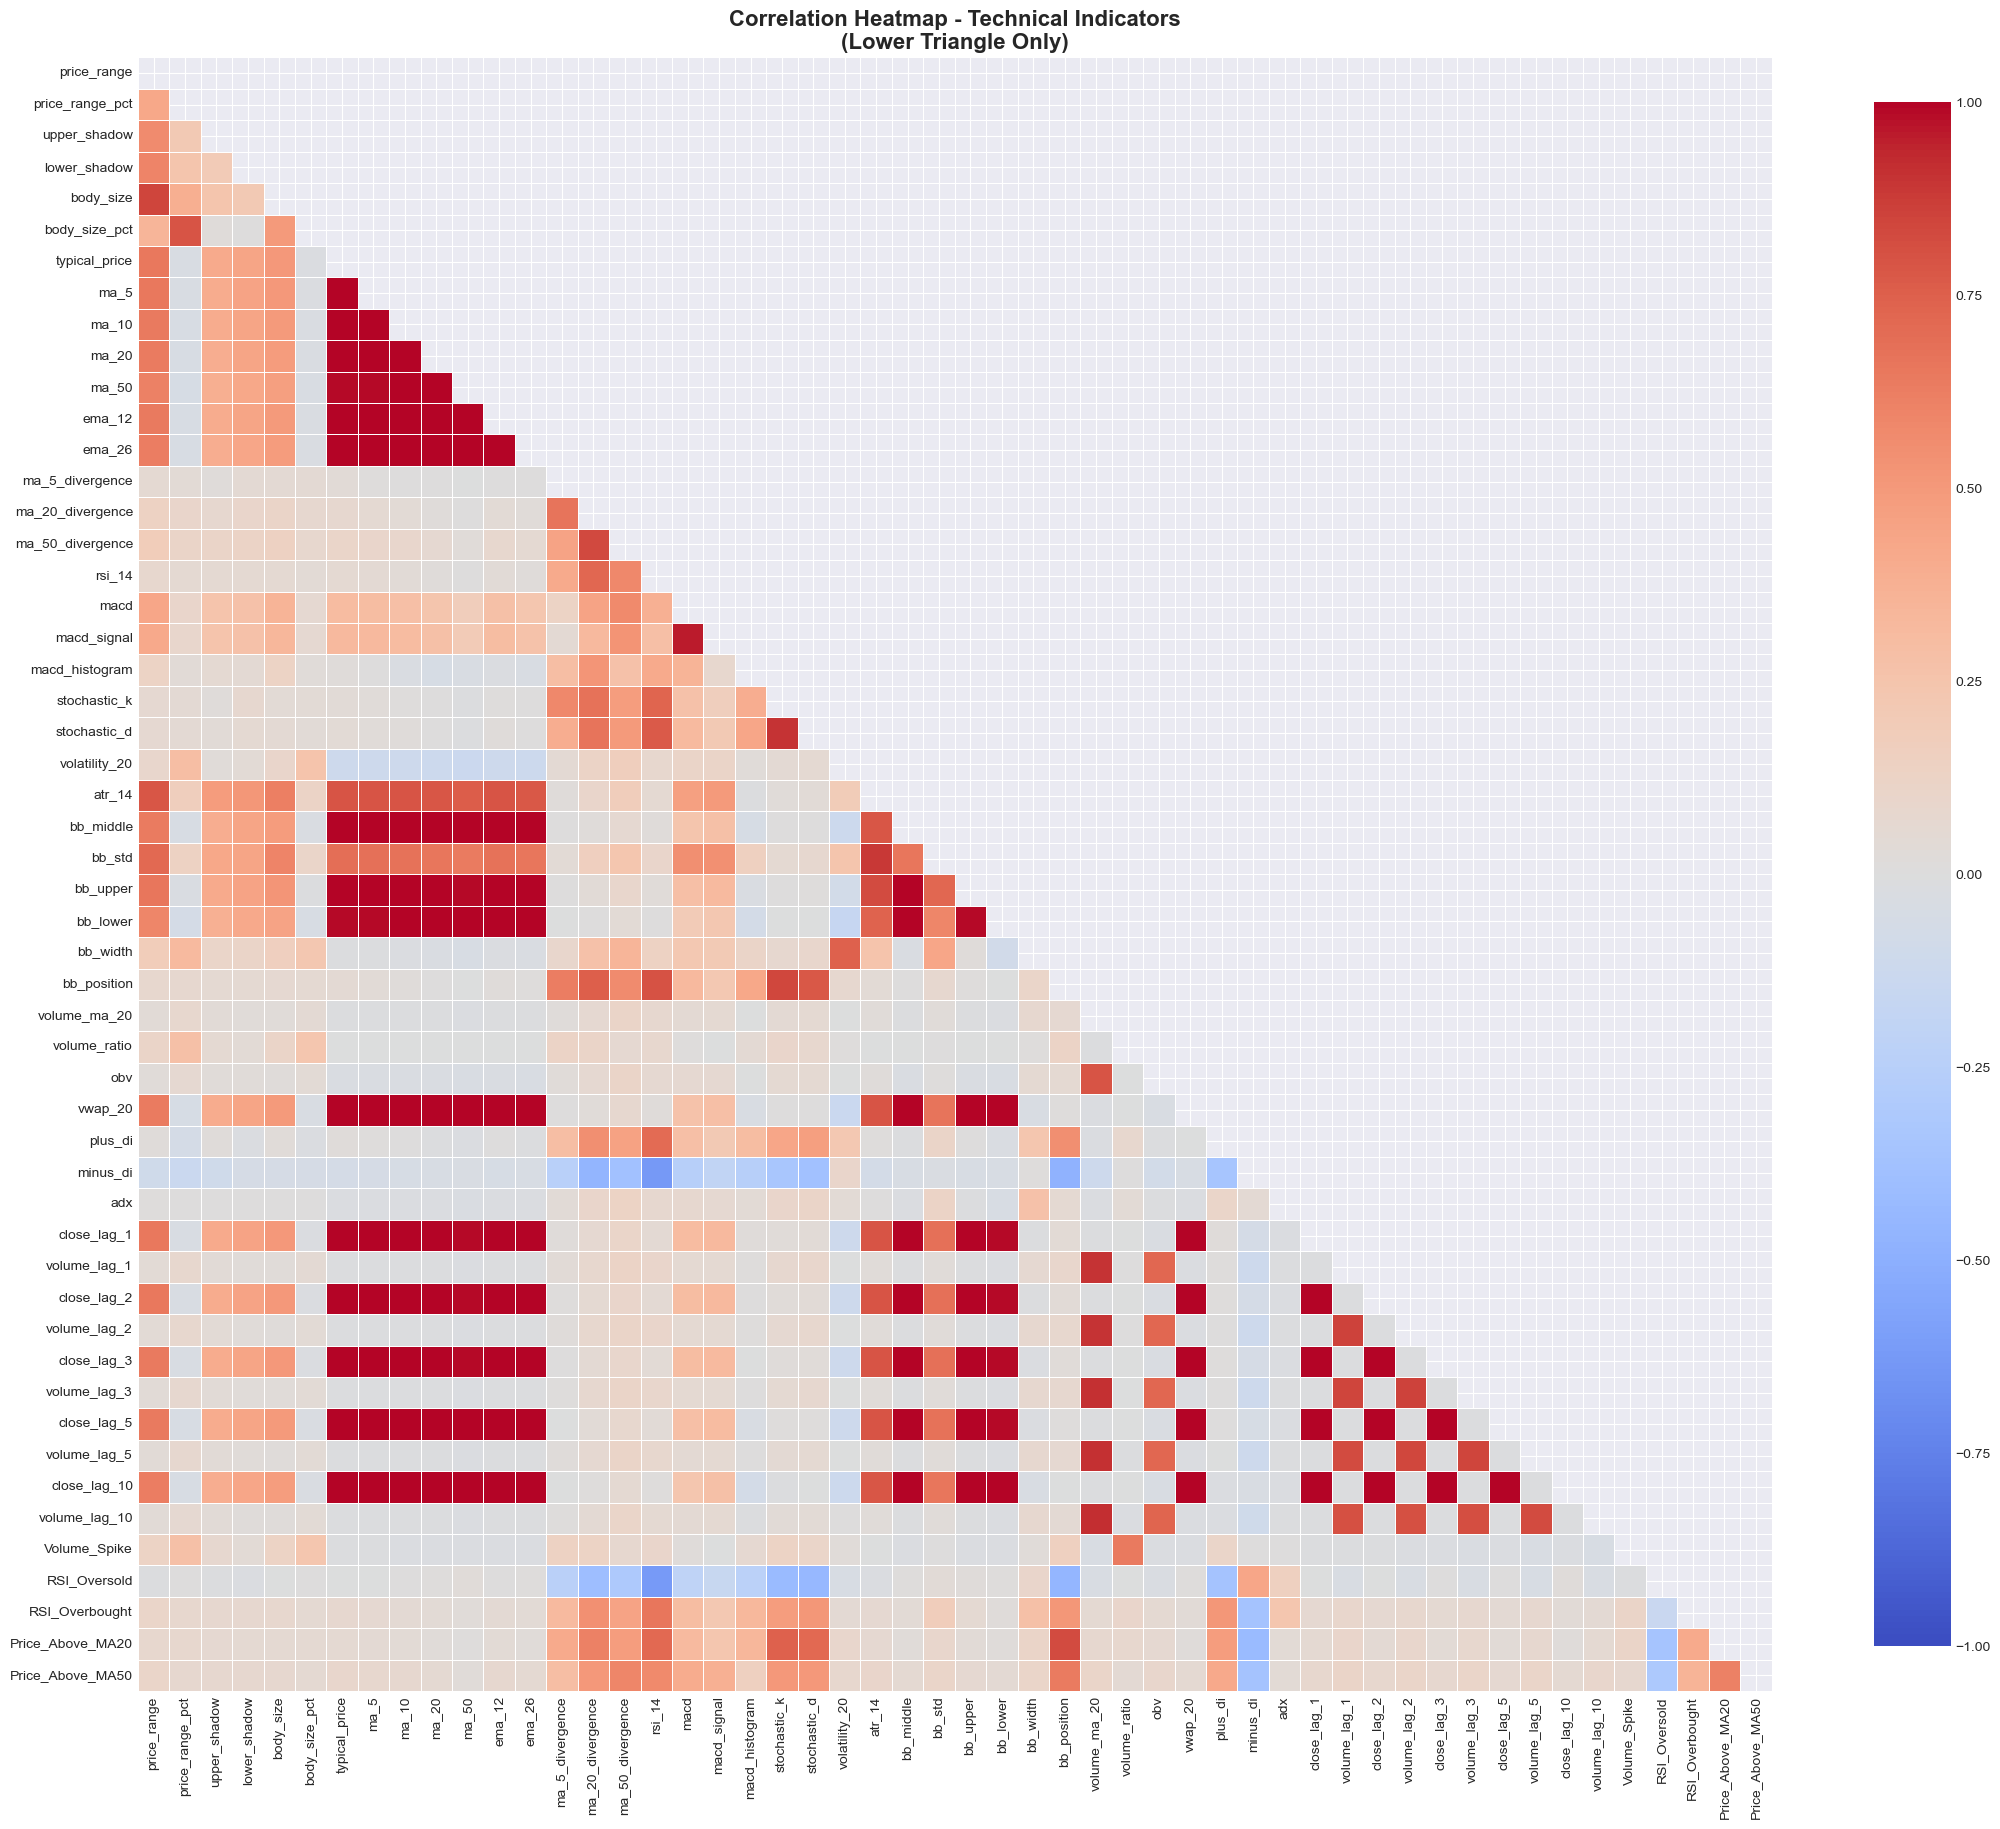

In [14]:
# Correlation matrix
print("=" * 80)
print("CORRELATION ANALYSIS - Detecting Redundant Features")
print("=" * 80)

corr_matrix = df[indicator_cols].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.85:  # Threshold for high correlation
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val,
                'Abs_Corr': abs(corr_val)
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Abs_Corr', ascending=False)
    print(f"\n⚠️ Found {len(high_corr_df)} pairs with |correlation| > 0.85:")
    display(high_corr_df.head(20))
    
    print("\n💡 INSIGHT: These pairs are highly redundant - we should keep only one from each pair!")
else:
    print("\n✅ No highly correlated pairs found")

# Visualize correlation heatmap
fig, ax = plt.subplots(figsize=(22, 20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Technical Indicators\n(Lower Triangle Only)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.3. Variance Analysis (Phát hiện Low-Variance Features)

VARIANCE ANALYSIS - Detecting Low-Variance Features

📉 Features with LOWEST variance (potential low information):


,Feature,Mean,Std,Variance,CV
RSI_Oversold,RSI_Oversold,0.118091,0.322718,0.104147,2.732799
RSI_Overbought,RSI_Overbought,0.141099,0.348127,0.121192,2.467243
macd_histogram,macd_histogram,0.002035,0.372891,0.139047,183.230039
Volume_Spike,Volume_Spike,0.172627,0.377928,0.142829,2.189268
upper_shadow,upper_shadow,0.165946,0.474410,0.225065,2.858819
Price_Above_MA50,Price_Above_MA50,0.511067,0.499881,0.249881,0.978113
Price_Above_MA20,Price_Above_MA20,0.491541,0.499932,0.249932,1.017071
lower_shadow,lower_shadow,0.195562,0.563042,0.317017,2.879105
body_size,body_size,0.409565,1.012426,1.025007,2.471953
macd_signal,macd_signal,0.159475,1.249430,1.561075,7.834657



📈 Features with HIGHEST variance (high information):


,Feature,Mean,Std,Variance,CV
close_lag_1,close_lag_1,3.097180e+01,3.272588e+01,1.070983e+03,1.056635
typical_price,typical_price,3.097575e+01,3.273342e+01,1.071477e+03,1.056743
bb_upper,bb_upper,3.287830e+01,3.488192e+01,1.216748e+03,1.060941
volume_ma_20,volume_ma_20,2.057198e+06,5.754432e+06,3.311348e+13,2.797218
volume_lag_10,volume_lag_10,2.067185e+06,6.346735e+06,4.028104e+13,3.070230
volume_lag_5,volume_lag_5,2.076394e+06,6.391169e+06,4.084704e+13,3.078013
volume_lag_2,volume_lag_2,2.078301e+06,6.397214e+06,4.092434e+13,3.078097
volume_lag_3,volume_lag_3,2.078495e+06,6.398455e+06,4.094023e+13,3.078408
volume_lag_1,volume_lag_1,2.078810e+06,6.399476e+06,4.095329e+13,3.078432
obv,obv,5.458635e+07,2.003528e+08,4.014125e+16,3.670383


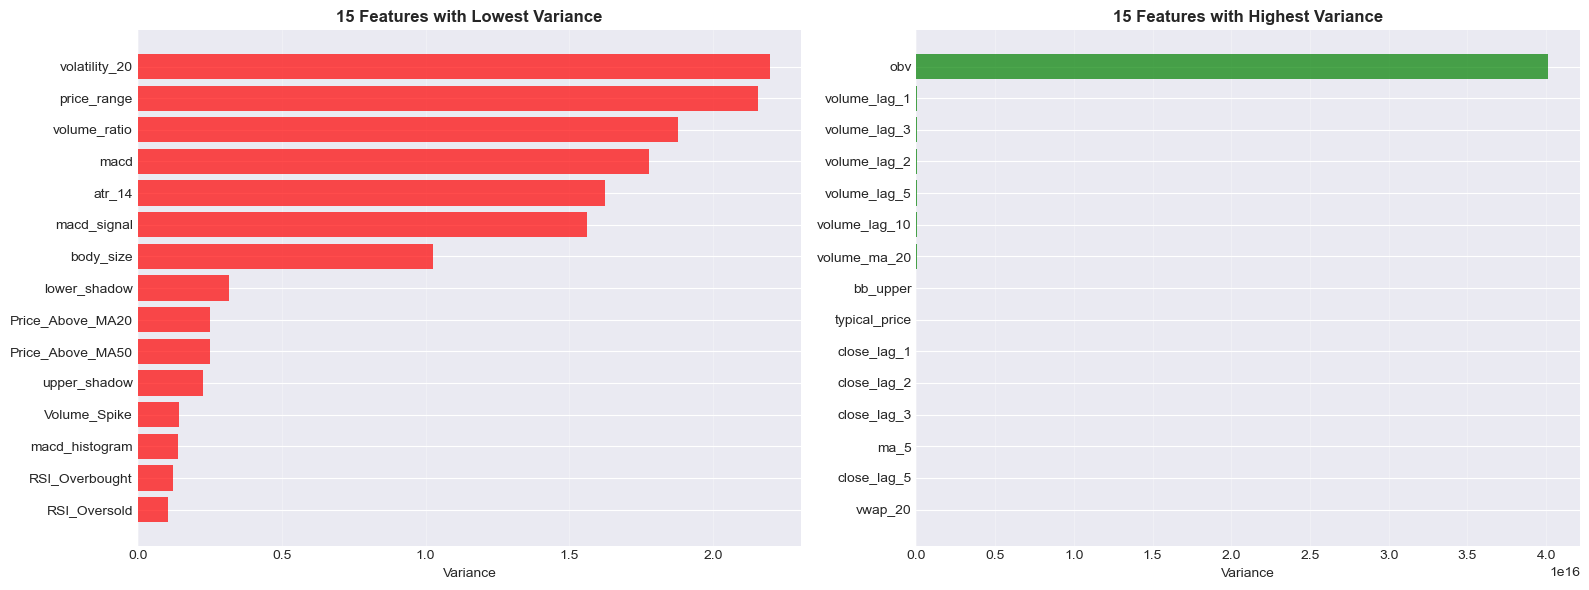


💡 INSIGHT: Low-variance features may not be useful for prediction!


In [15]:
print("=" * 80)
print("VARIANCE ANALYSIS - Detecting Low-Variance Features")
print("=" * 80)

# Calculate coefficient of variation (CV = std/mean)
variance_analysis = pd.DataFrame({
    'Feature': indicator_cols,
    'Mean': df[indicator_cols].mean(),
    'Std': df[indicator_cols].std(),
    'Variance': df[indicator_cols].var(),
    'CV': (df[indicator_cols].std() / df[indicator_cols].mean().abs()).replace([np.inf, -np.inf], np.nan)
})
variance_analysis = variance_analysis.sort_values('Variance')

print("\n📉 Features with LOWEST variance (potential low information):")
display(variance_analysis.head(10))

print("\n📈 Features with HIGHEST variance (high information):")
display(variance_analysis.tail(10))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Low variance features
axes[0].barh(variance_analysis.head(15)['Feature'], 
             variance_analysis.head(15)['Variance'], color='red', alpha=0.7)
axes[0].set_xlabel('Variance')
axes[0].set_title('15 Features with Lowest Variance', fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# High variance features
axes[1].barh(variance_analysis.tail(15)['Feature'], 
             variance_analysis.tail(15)['Variance'], color='green', alpha=0.7)
axes[1].set_xlabel('Variance')
axes[1].set_title('15 Features with Highest Variance', fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Low-variance features may not be useful for prediction!")

### 4.4. Distribution Analysis (Kiểm tra Skewness & Outliers)

DISTRIBUTION ANALYSIS - Checking for Skewness & Outliers

⚠️ Top 15 Most Skewed Features (|skewness| > 2 = highly skewed):


,Feature,Skewness,Abs_Skewness
2,upper_shadow,15.249602,15.249602
4,body_size,13.763265,13.763265
3,lower_shadow,13.570594,13.570594
0,price_range,9.655945,9.655945
25,bb_std,9.007372,9.007372
23,atr_14,7.825446,7.825446
46,volume_lag_10,7.450266,7.450266
44,volume_lag_5,7.449799,7.449799
42,volume_lag_3,7.437524,7.437524
40,volume_lag_2,7.435200,7.435200


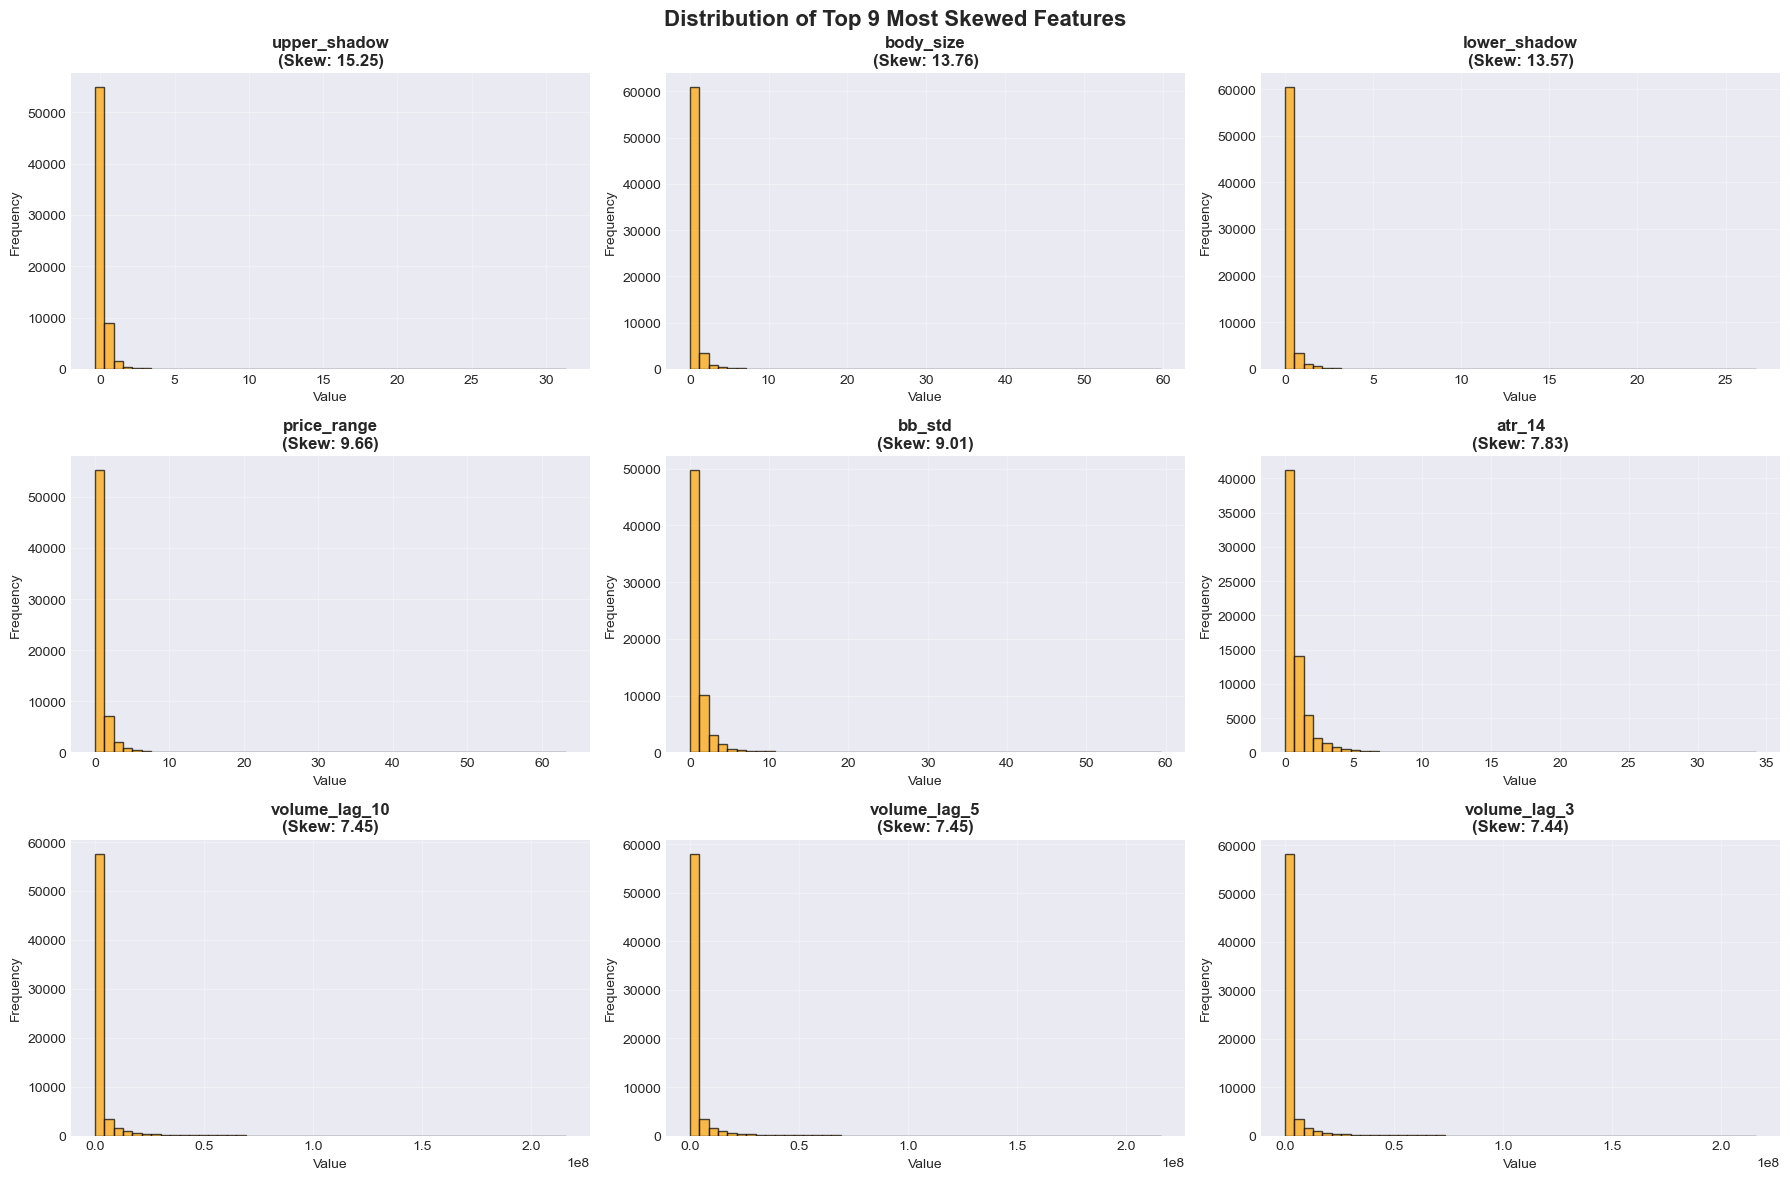


💡 INSIGHT: Highly skewed features may need transformation or could be less useful!


In [16]:
print("=" * 80)
print("DISTRIBUTION ANALYSIS - Checking for Skewness & Outliers")
print("=" * 80)

# Calculate skewness
from scipy.stats import skew
skewness = df[indicator_cols].apply(lambda x: skew(x.dropna()))
skew_df = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'Abs_Skewness': abs(skewness.values)
}).sort_values('Abs_Skewness', ascending=False)

print("\n⚠️ Top 15 Most Skewed Features (|skewness| > 2 = highly skewed):")
display(skew_df.head(15))

# Visualize distributions of top skewed features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Distribution of Top 9 Most Skewed Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(skew_df.head(9)['Feature']):
    row, col = idx // 3, idx % 3
    axes[row, col].hist(df[feature].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{feature}\n(Skew: {skew_df[skew_df["Feature"]==feature]["Skewness"].values[0]:.2f})', 
                             fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Highly skewed features may need transformation or could be less useful!")

### 4.5. Missing Values Pattern

MISSING VALUES PATTERN ANALYSIS

⚠️ Features with missing values:


,Feature,Missing_Count,Missing_Pct
rsi_14,rsi_14,1965,2.96
stochastic_k,stochastic_k,1861,2.81
plus_di,plus_di,1802,2.72
minus_di,minus_di,1802,2.72
stochastic_d,stochastic_d,1739,2.62
bb_position,bb_position,1711,2.58
adx,adx,1465,2.21
vwap_20,vwap_20,1137,1.71
volume_ratio,volume_ratio,1137,1.71
volume_lag_10,volume_lag_10,999,1.51


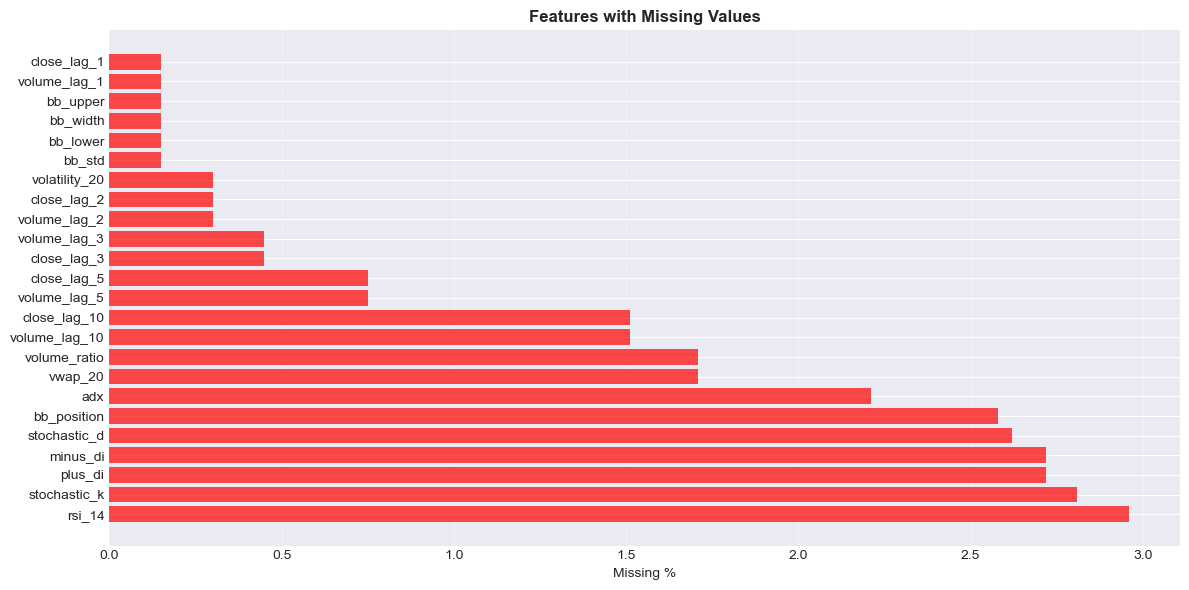


💡 INSIGHT: Features with high missing % may need imputation or removal!


In [17]:
print("=" * 80)
print("MISSING VALUES PATTERN ANALYSIS")
print("=" * 80)

missing_summary = pd.DataFrame({
    'Feature': indicator_cols,
    'Missing_Count': df[indicator_cols].isnull().sum(),
    'Missing_Pct': (df[indicator_cols].isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Pct', ascending=False)

if missing_summary['Missing_Pct'].max() > 0:
    print(f"\n⚠️ Features with missing values:")
    display(missing_summary[missing_summary['Missing_Pct'] > 0])
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_features = missing_summary[missing_summary['Missing_Pct'] > 0]
    ax.barh(missing_features['Feature'], missing_features['Missing_Pct'], color='red', alpha=0.7)
    ax.set_xlabel('Missing %')
    ax.set_title('Features with Missing Values', fontweight='bold')
    ax.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\n💡 INSIGHT: Features with high missing % may need imputation or removal!")
else:
    print("\n✅ No missing values in technical indicators!")

---

## 5. Feature Selection (Loại bỏ Features dựa trên EDA)

### 5.1. Kết luận từ EDA & Đề xuất Loại bỏ

In [18]:
print("=" * 80)
print("EDA CONCLUSION & FEATURE SELECTION RECOMMENDATION")
print("=" * 80)

# Collect features to remove based on EDA findings
features_to_remove = []

print("\n📋 BASED ON EDA RESULTS:\n")

# 1. From Correlation Analysis
if len(high_corr_df) > 0:
    print("1️⃣ REDUNDANT FEATURES (high correlation > 0.85):")
    redundant_features = []
    
    # Strategy: For each high-corr pair, remove the "less important" one based on domain knowledge
    redundancy_rules = {
        'bb_middle': 'ma_20',  # bb_middle = ma_20 (exact duplicate)
        'ema_12': 'macd',      # EMA-12 already captured in MACD
        'ema_26': 'macd',      # EMA-26 already captured in MACD
        'ma_10': 'ma_5',       # MA-10 redundant with MA-5 and MA-20
        'close_lag_2': 'close_lag_1',  # Too many lagged features
        'close_lag_3': 'close_lag_1',
        'volume_lag_2': 'volume_lag_1',
        'volume_lag_3': 'volume_lag_1',
    }
    
    seen_pairs = set()
    for _, row in high_corr_df.iterrows():
        pair = tuple(sorted([row['Feature_1'], row['Feature_2']]))
        if pair not in seen_pairs:
            seen_pairs.add(pair)
            
            # Apply domain knowledge rules
            if row['Feature_1'] in redundancy_rules:
                redundant_features.append(row['Feature_1'])
                print(f"   ❌ Remove: {row['Feature_1']} (duplicate of {redundancy_rules[row['Feature_1']]})")
            elif row['Feature_2'] in redundancy_rules:
                redundant_features.append(row['Feature_2'])
                print(f"   ❌ Remove: {row['Feature_2']} (duplicate of {redundancy_rules[row['Feature_2']]})")
            else:
                # Default: keep Feature_1, remove Feature_2
                redundant_features.append(row['Feature_2'])
                print(f"   ❌ Remove: {row['Feature_2']} (corr={row['Correlation']:.3f} with {row['Feature_1']})")
    
    features_to_remove.extend(redundant_features)

# 2. Domain Knowledge Removals (manual based on financial analysis best practices)
print("\n2️⃣ DOMAIN KNOWLEDGE REMOVALS:")
domain_removals = [
    'typical_price',  # Less useful than VWAP
    'bb_std',         # Already captured in bb_width
    'upper_shadow',   # Less informative than body_size
    'lower_shadow',   # Less informative than body_size
]
for feat in domain_removals:
    if feat in indicator_cols:  # Only remove if exists
        print(f"   ❌ Remove: {feat} (less useful in practice)")
features_to_remove.extend(domain_removals)

# 3. Lagged Features Reduction (keep only strategic lags)
print("\n3️⃣ LAGGED FEATURES REDUCTION:")
lag_removals = [
    'close_lag_1',   # Too noisy, keep lag_5 and lag_10
    'volume_lag_1',  # Too noisy
]
for feat in lag_removals:
    if feat in indicator_cols and feat not in features_to_remove:
        print(f"   ❌ Remove: {feat} (short-term lag too noisy)")
features_to_remove.extend(lag_removals)

# Remove duplicates
features_to_remove = list(set([f for f in features_to_remove if f in indicator_cols]))

print(f"\n" + "="*80)
print(f"📊 SUMMARY:")
print(f"   • Original features:     {len(indicator_cols)}")
print(f"   • Recommended to remove: {len(features_to_remove)}")
print(f"   • Remaining features:    {len(indicator_cols) - len(features_to_remove)}")
print(f"   • Reduction:             {len(features_to_remove)/len(indicator_cols)*100:.1f}%")
print("="*80)

# Preview features to remove
print(f"\n🗑️ FEATURES TO REMOVE ({len(features_to_remove)}):")
for i, feat in enumerate(sorted(features_to_remove), 1):
    print(f"   {i:2d}. {feat}")

# Preview final feature set
remaining_features = [f for f in indicator_cols if f not in features_to_remove]
print(f"\n✅ FINAL FEATURE SET ({len(remaining_features)} features):")
for i, feat in enumerate(sorted(remaining_features), 1):
    print(f"   {i:2d}. {feat}")

EDA CONCLUSION & FEATURE SELECTION RECOMMENDATION

📋 BASED ON EDA RESULTS:

1️⃣ REDUNDANT FEATURES (high correlation > 0.85):
   ❌ Remove: bb_middle (duplicate of ma_20)
   ❌ Remove: ma_10 (duplicate of ma_5)
   ❌ Remove: close_lag_2 (duplicate of close_lag_1)
   ❌ Remove: ema_26 (duplicate of macd)
   ❌ Remove: ema_26 (duplicate of macd)
   ❌ Remove: close_lag_1 (corr=1.000 with ma_5)
   ❌ Remove: close_lag_3 (duplicate of close_lag_1)
   ❌ Remove: close_lag_1 (corr=1.000 with typical_price)
   ❌ Remove: bb_middle (duplicate of ma_20)
   ❌ Remove: vwap_20 (corr=1.000 with ma_20)
   ❌ Remove: ema_12 (duplicate of macd)
   ❌ Remove: ma_10 (duplicate of ma_5)
   ❌ Remove: ma_10 (duplicate of ma_5)
   ❌ Remove: close_lag_2 (duplicate of close_lag_1)
   ❌ Remove: close_lag_2 (duplicate of close_lag_1)
   ❌ Remove: ema_12 (duplicate of macd)
   ❌ Remove: ema_26 (duplicate of macd)
   ❌ Remove: ma_5 (corr=0.999 with typical_price)
   ❌ Remove: ma_10 (duplicate of ma_5)
   ❌ Remove: ema_12 (d

### 5.2. Apply Feature Selection

In [19]:
# Apply feature removal
print("=" * 80)
print("APPLYING FEATURE SELECTION...")
print("=" * 80)

# Drop selected features
df_cleaned = df.drop(columns=features_to_remove, errors='ignore')

print(f"\n✅ Dropped {len(features_to_remove)} features")
print(f"✅ Remaining: {df_cleaned.shape[1]} columns ({len(remaining_features)} technical indicators)")

# Verify
print(f"\n📊 DataFrame shape:")
print(f"   Before: {df.shape}")
print(f"   After:  {df_cleaned.shape}")

print(f"\n💾 Memory usage:")
print(f"   Before: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   After:  {df_cleaned.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Saved:  {(df.memory_usage(deep=True).sum() - df_cleaned.memory_usage(deep=True).sum()) / 1024**2:.2f} MB")

# Show final columns
print("\n📋 Final technical indicators:")
final_indicators = [col for col in df_cleaned.columns if col not in 
                    ['time', 'symbol', 'open', 'high', 'low', 'close', 'volume']]
for i, col in enumerate(sorted(final_indicators), 1):
    print(f"  {i:2d}. {col}")

# Update df for subsequent analysis
df = df_cleaned.copy()
print("\n" + "="*80)
print("✅ Feature selection complete! Updated 'df' with cleaned features.")
print("="*80)

APPLYING FEATURE SELECTION...

✅ Dropped 27 features
✅ Remaining: 32 columns (25 technical indicators)

📊 DataFrame shape:
   Before: (66322, 59)
   After:  (66322, 32)

💾 Memory usage:
   Before: 31.88 MB
   After:  18.22 MB
   Saved:  13.66 MB

📋 Final technical indicators:
   1. Price_Above_MA20
   2. Price_Above_MA50
   3. RSI_Overbought
   4. RSI_Oversold
   5. Volume_Spike
   6. adx
   7. atr_14
   8. bb_position
   9. bb_width
  10. body_size_pct
  11. ma_20_divergence
  12. ma_50_divergence
  13. ma_5_divergence
  14. macd
  15. macd_histogram
  16. minus_di
  17. obv
  18. plus_di
  19. price_range
  20. price_range_pct
  21. rsi_14
  22. stochastic_k
  23. volatility_20
  24. volume_ma_20
  25. volume_ratio

✅ Feature selection complete! Updated 'df' with cleaned features.


### 5.3. Verify Feature Selection Results

VERIFICATION: Checking Remaining Correlations

✅ SUCCESS! No pairs with |correlation| > 0.85 remaining!


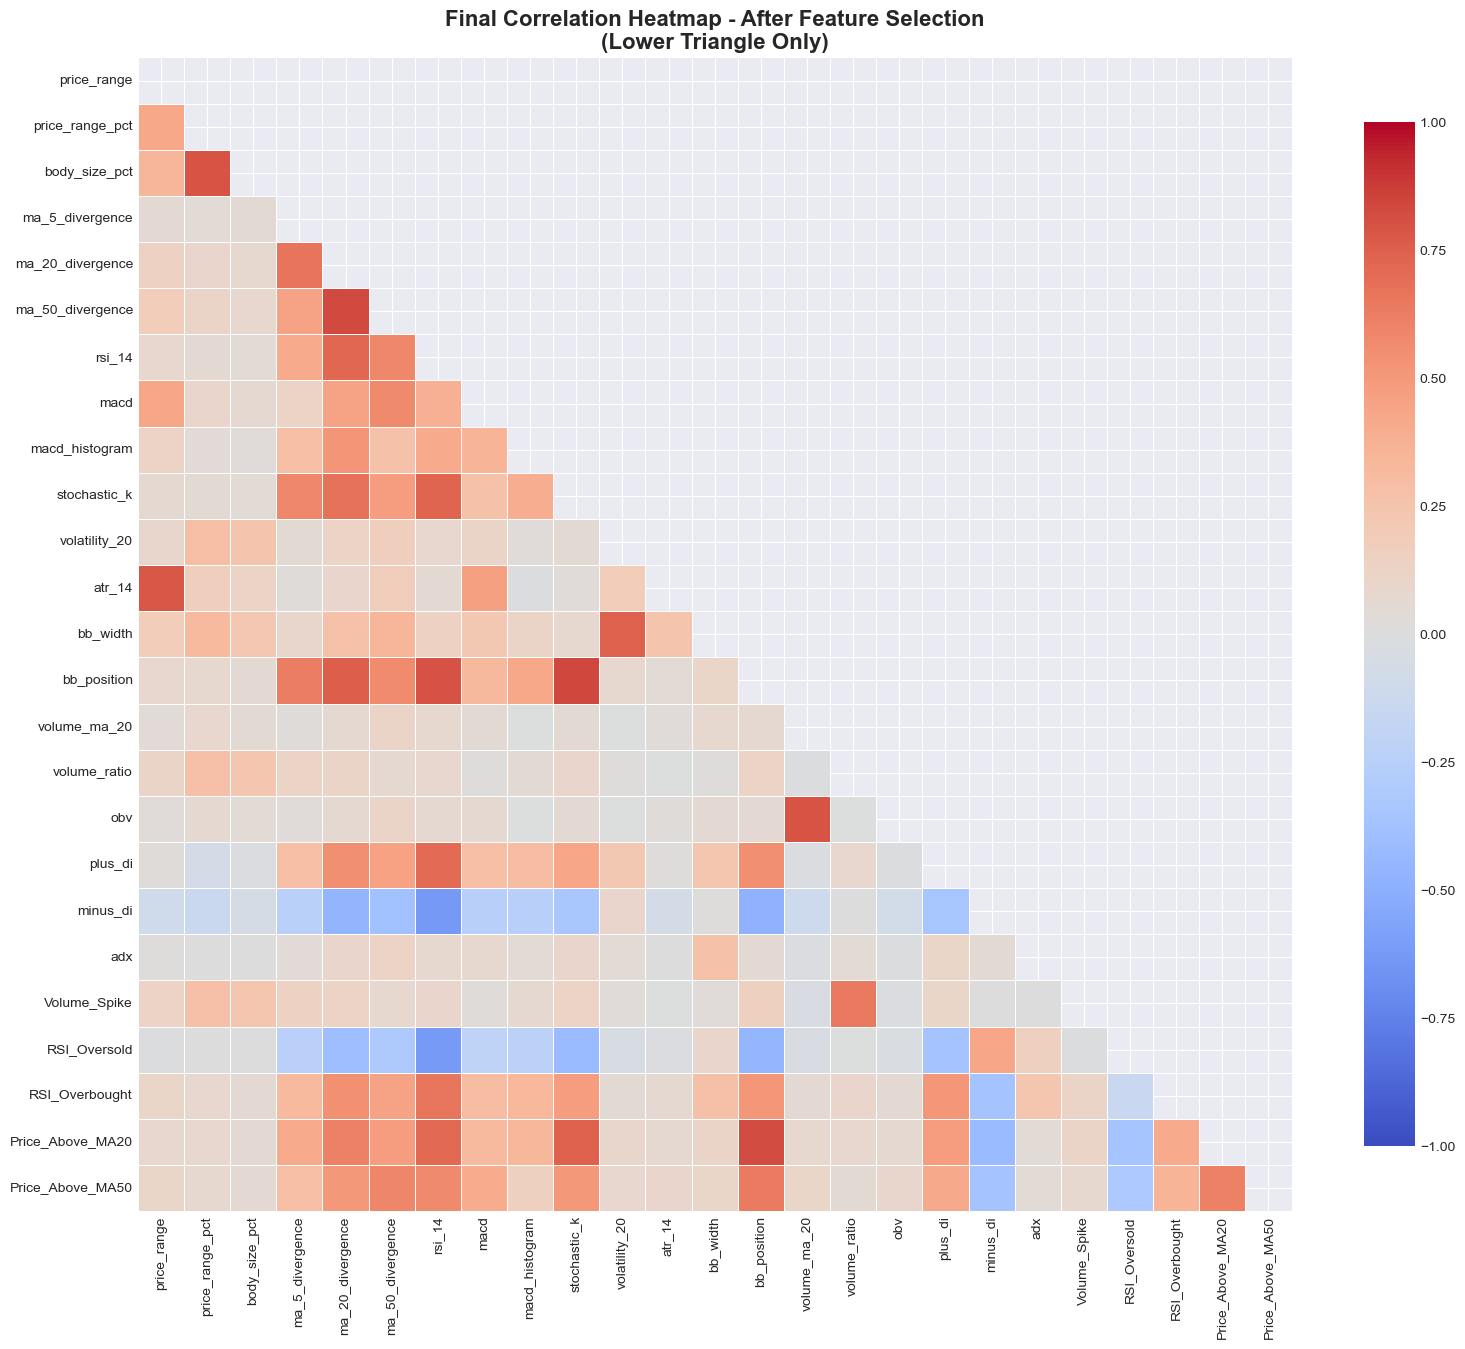


✅ Feature selection verification complete!


In [20]:
# Verify no high correlation remaining
print("=" * 80)
print("VERIFICATION: Checking Remaining Correlations")
print("=" * 80)

final_indicators_list = [col for col in df.columns if col not in 
                         ['time', 'symbol', 'open', 'high', 'low', 'close', 'volume']]

final_corr_matrix = df[final_indicators_list].corr()

# Find high correlations in final set
final_high_corr = []
for i in range(len(final_corr_matrix.columns)):
    for j in range(i+1, len(final_corr_matrix.columns)):
        corr_val = final_corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.85:
            final_high_corr.append({
                'Feature_1': final_corr_matrix.columns[i],
                'Feature_2': final_corr_matrix.columns[j],
                'Correlation': corr_val
            })

if final_high_corr:
    final_high_corr_df = pd.DataFrame(final_high_corr).sort_values('Correlation', ascending=False, key=abs)
    print(f"\n⚠️ Still found {len(final_high_corr_df)} pairs with |correlation| > 0.85:")
    display(final_high_corr_df)
    print("\n💡 Consider removing one from each pair in future iterations")
else:
    print("\n✅ SUCCESS! No pairs with |correlation| > 0.85 remaining!")

# Visualize final correlation matrix
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Final Correlation Heatmap - After Feature Selection\n(Lower Triangle Only)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Feature selection verification complete!")
print("="*80)

In [21]:
# Hãy lưu data đã xử lý vào file mới
OUTPUT_PATH = Path("../../data/processed/ta/ta_data_technical_indicators.csv")
df.to_csv(OUTPUT_PATH, index=False)
print(f"\n💾 Cleaned data saved to: {OUTPUT_PATH}")


💾 Cleaned data saved to: ..\..\data\processed\ta\ta_data_technical_indicators.csv
